In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
np.random.seed(666)
ruta='files/'

df=pd.read_csv(ruta+'Países.csv')
df.head()
# En logística el 20% de tus productos debe representar la utilidad
# Si el 20 porciento de las categorias esta presente en el 80% de las observaciones, tenemos exceso de categorias

,Países
0,MEX
1,CHN
2,CAN
3,POL
4,CPV


In [2]:
n=len(df.Países.unique())
n

91

In [3]:
n_obs = df.shape[0]
n_obs

560

In [4]:
round(n_obs*0.8)

448

In [5]:
# El objetivo es tener entonces 19 categorias o menos (20%)
n*0.2

18.2

<Axes: >

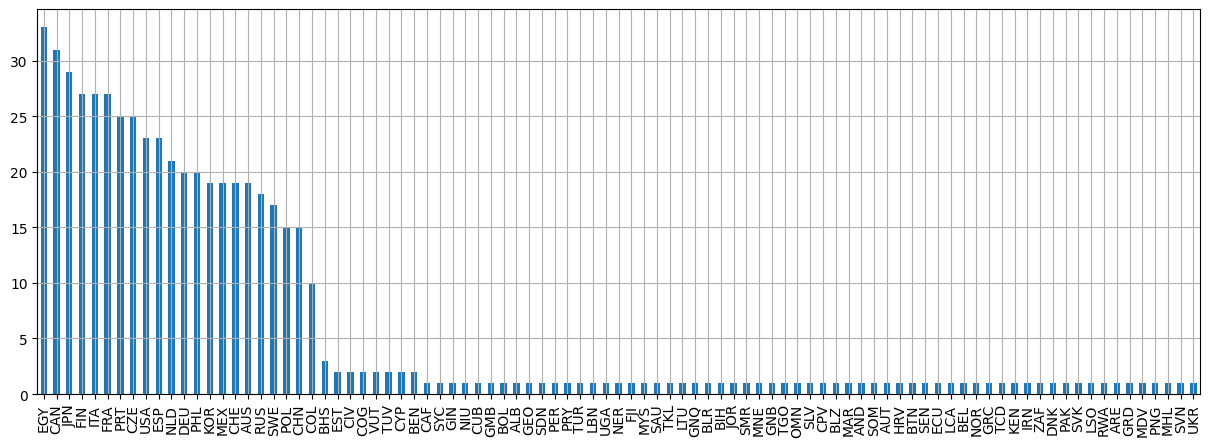

In [6]:
# vc value counts
vc=df.Países.value_counts(ascending=False)
vc.plot.bar(figsize=(15,5), grid=True)

In [7]:
import matplotlib.pyplot as plt

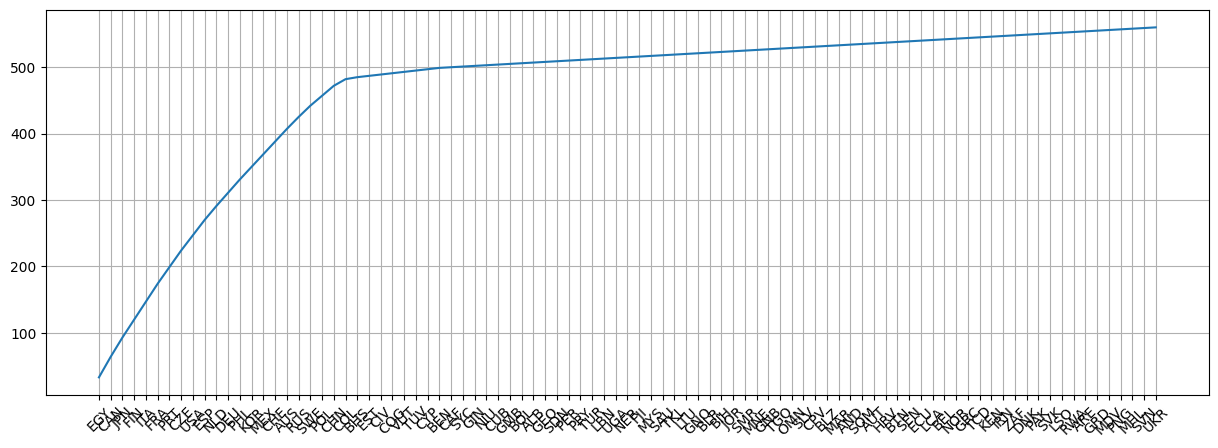

In [17]:
# Grafico acumulativo
cs=vc.cumsum()
cs.plot(figsize=(15,5), grid=True)
t=plt.xticks(range(n), vc.index, rotation=45)

In [9]:
import numpy as np
idx=np.where(cs>n_obs*0.8)[0][0] #Indice del primer pais
idx

19

In [10]:
cs[19]/n_obs

0.8160714285714286

# Feature hashing (Hashing trick)

In [12]:
# Número de categorías finales
m=20

## Función hash para representar la frecuencia

In [39]:
# definimos el contador
cnt=[0]*m
cnt

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [40]:
# Por frecuencia
cs.index

Index(['EGY', 'CAN', 'JPN', 'FIN', 'ITA', 'FRA', 'PRT', 'CZE', 'USA', 'ESP',
       'NLD', 'DEU', 'PHL', 'KOR', 'MEX', 'CHE', 'AUS', 'RUS', 'SWE', 'POL',
       'CHN', 'COL', 'BHS', 'EST', 'CIV', 'COG', 'VUT', 'TUV', 'CYP', 'BEN',
       'CAF', 'SYC', 'GIN', 'NIU', 'CUB', 'GMB', 'BOL', 'ALB', 'GEO', 'SDN',
       'PER', 'PRY', 'TUR', 'LBN', 'UGA', 'NER', 'FJI', 'MYS', 'SAU', 'TKL',
       'LTU', 'GNQ', 'BLR', 'BIH', 'JOR', 'SMR', 'MNE', 'GNB', 'TGO', 'OMN',
       'SLV', 'CPV', 'BLZ', 'MAR', 'AND', 'SOM', 'AUT', 'HRV', 'BTN', 'SEN',
       'ECU', 'LCA', 'BEL', 'NOR', 'GRC', 'TCD', 'KEN', 'IRN', 'ZAF', 'DNK',
       'PAK', 'SVK', 'LSO', 'RWA', 'ARE', 'GRD', 'MDV', 'PNG', 'MHL', 'SVN',
       'UKR'],
      dtype='object')

In [41]:
keys={catego:id for catego, id in zip(cs.index,range(n_obs))}
keys

{'EGY': 0,
 'CAN': 1,
 'JPN': 2,
 'FIN': 3,
 'ITA': 4,
 'FRA': 5,
 'PRT': 6,
 'CZE': 7,
 'USA': 8,
 'ESP': 9,
 'NLD': 10,
 'DEU': 11,
 'PHL': 12,
 'KOR': 13,
 'MEX': 14,
 'CHE': 15,
 'AUS': 16,
 'RUS': 17,
 'SWE': 18,
 'POL': 19,
 'CHN': 20,
 'COL': 21,
 'BHS': 22,
 'EST': 23,
 'CIV': 24,
 'COG': 25,
 'VUT': 26,
 'TUV': 27,
 'CYP': 28,
 'BEN': 29,
 'CAF': 30,
 'SYC': 31,
 'GIN': 32,
 'NIU': 33,
 'CUB': 34,
 'GMB': 35,
 'BOL': 36,
 'ALB': 37,
 'GEO': 38,
 'SDN': 39,
 'PER': 40,
 'PRY': 41,
 'TUR': 42,
 'LBN': 43,
 'UGA': 44,
 'NER': 45,
 'FJI': 46,
 'MYS': 47,
 'SAU': 48,
 'TKL': 49,
 'LTU': 50,
 'GNQ': 51,
 'BLR': 52,
 'BIH': 53,
 'JOR': 54,
 'SMR': 55,
 'MNE': 56,
 'GNB': 57,
 'TGO': 58,
 'OMN': 59,
 'SLV': 60,
 'CPV': 61,
 'BLZ': 62,
 'MAR': 63,
 'AND': 64,
 'SOM': 65,
 'AUT': 66,
 'HRV': 67,
 'BTN': 68,
 'SEN': 69,
 'ECU': 70,
 'LCA': 71,
 'BEL': 72,
 'NOR': 73,
 'GRC': 74,
 'TCD': 75,
 'KEN': 76,
 'IRN': 77,
 'ZAF': 78,
 'DNK': 79,
 'PAK': 80,
 'SVK': 81,
 'LSO': 82,
 'RWA': 83,
 '

### Función hash

In [42]:
# Se hacen como nuevos subconjuntos cuando son divisibles entre N
# Pero no deberías conocer las categórias
for ob in df.Países:
    i=keys[ob]%m
    cnt[i]+=1
cnt

[51,
 44,
 35,
 32,
 32,
 32,
 30,
 30,
 28,
 28,
 25,
 23,
 23,
 22,
 22,
 22,
 22,
 21,
 20,
 18]

In [22]:
# Lo mismo pero con otro identificador (No ordenados)
# reiniciamos contador
cnt=[0]*m
keys={catego:id for catego, id in zip(df.Países.unique(),range(n_obs))}

for ob in df.Países:
    i=keys[ob]%m
    cnt[i]+=1
cnt

[24, 21, 64, 43, 23, 33, 59, 51, 32, 40, 48, 5, 30, 21, 4, 26, 5, 4, 5, 22]

## Función MurmurHash3 de 32 bits

In [23]:
from sklearn.feature_extraction import FeatureHasher

In [43]:
FH = FeatureHasher(m)
data = FH.transform([keys])
data.toarray()

array([[ -98.,   94.,   59.,    7.,   69., -207.,  139.,  -44.,   21.,
         -40.,  -38.,  -50.,   29., -251.,  264.,   86.,   19., -208.,
         136.,  272.]])

In [44]:
from category_encoders import HashingEncoder

In [47]:
# cols la categoría que quieres codificar
fMMH3=HashingEncoder(n_components=m, cols=['Países'])
fMMH3.fit_transform(df)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
556,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
557,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
558,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
